In [52]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numba

In [53]:
# Model parameters
J = 1
LENGTH = 25
CRITICAL_TEMP = 2 / np.log(1 + np.sqrt(2))

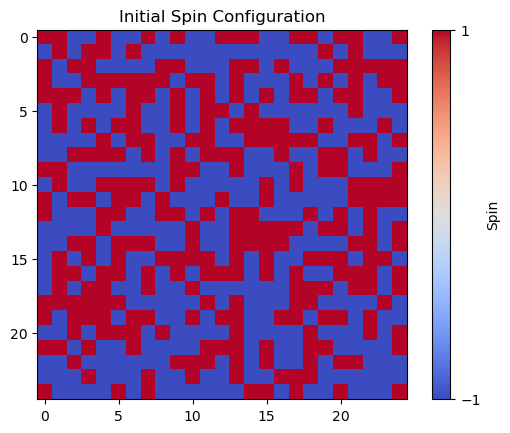

In [54]:
# Initial configuration

#### DA LEVARE ALLA FINE ########
#################################
################################
#################################
np.random.seed(1234567)
################################
#################################
##################################

SPIN_UP = 1
SPIN_DOWN = -1

initial_configuration = np.zeros((LENGTH, LENGTH))
for i in range(LENGTH):
    for j in range(LENGTH):
        tmp = np.random.randint(0, 2)
        if tmp == 0 : 
            tmp = SPIN_DOWN
        else :
            tmp = SPIN_UP    
        initial_configuration[i,j] = tmp
 
plt.imshow(initial_configuration, cmap="coolwarm", interpolation="nearest")
cbar = plt.colorbar(ticks=[SPIN_DOWN, SPIN_UP])  # Set colorbar ticks to -1 and +1
cbar.set_label("Spin")
plt.title("Initial Spin Configuration")
plt.show()

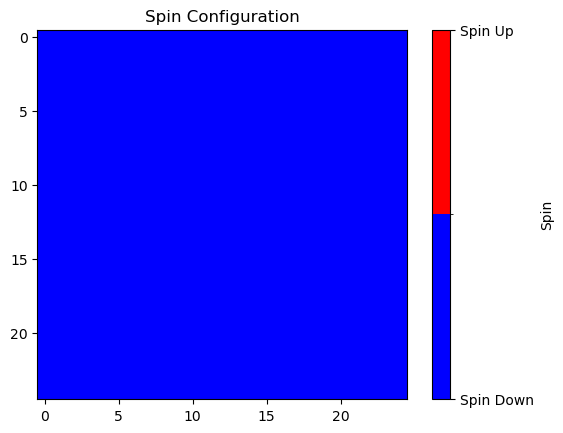

In [ ]:
def neighbors_list_pbc():
    neighbors_list = {}
    for i in range(LENGTH):
        for j in range(LENGTH):
            neighbors = []
            # Apply periodic boundary conditions (PBC) with modulo operator
            neighbors.append(((i - 1) % LENGTH, j))  
            neighbors.append(((i + 1) % LENGTH, j))  
            neighbors.append((i, (j - 1) % LENGTH))  
            neighbors.append((i, (j + 1) % LENGTH))        
            neighbors_list[(i, j)] = neighbors           
    return neighbors_list

neighbors_list = neighbors_list_pbc()    

def system_energy(configuration, neighbors_list):
    energy = 0 
    for (i, j), neighbors in neighbors_list.items():
        for neighbor in neighbors:
            neighbor_i, neighbor_j = neighbor
            energy -= J * configuration[i][j] * configuration[neighbor_i][neighbor_j]
    return energy

def metropolis (old_configuration : np.ndarray, new_configuration : np.ndarray, beta : float) -> bool:
    delta_Energy=system_energy(new_configuration, neighbors_list) - system_energy(old_configuration, neighbors_list)
    if delta_Energy <= 0: return True
    elif np.random.random() <= np.exp(- beta * delta_Energy ) : return True
    return False            

def metropolis_spin_flip_dynamics (old_configuration, beta):
    i = np.random.randint(0, LENGTH)
    j = np.random.randint(0, LENGTH)
    neighbor_sum = sum(old_configuration[neighbor] for neighbor in neighbors_list[(i, j)])
    delta_energy = 2 * J * old_configuration[i,j] * neighbor_sum
    new_configuration= old_configuration.copy()
    new_configuration[i,j] = -old_configuration[i,j] # spin flip
    if delta_energy <= 0: return new_configuration
    elif np.random.random() <= np.exp(- beta * delta_energy ) : return new_configuration
    return old_configuration   

def glauber_spin_flip_dynamics (old_configuration, beta):
    i = np.random.randint(0, LENGTH)
    j = np.random.randint(0, LENGTH)
    neighbor_sum = sum(old_configuration[neighbor] for neighbor in neighbors_list[(i, j)])
    delta_energy = 2 * J * old_configuration[i,j] * neighbor_sum
    new_configuration= old_configuration.copy()
    new_configuration[i,j] = -old_configuration[i,j] # spin flip
    if delta_energy <= 0: return new_configuration
    elif np.random.random() <= 1 / (1 + np.exp( beta * delta_energy )) : return new_configuration
    return old_configuration   

TIMESTEPS = 1000 * (LENGTH * LENGTH)

configurations = np.zeros((TIMESTEPS, LENGTH, LENGTH))
configurations[0] = initial_configuration
beta = 1/(0.34)

for i in range(1, TIMESTEPS):
    configurations[i] = metropolis_spin_flip_dynamics(configurations[i-1], beta)

# Define custom colormap: blue for -1 (spin down), red for 1 (spin up)
cmap = mcolors.ListedColormap(["blue", "red"])
bounds = [-1, 0, 1]  # Boundaries for -1, 1
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Plot the final configuration with the custom colormap
plt.imshow(configurations[TIMESTEPS-1], cmap=cmap, norm=norm, interpolation="nearest")
cbar = plt.colorbar(ticks=[-1, 1])  # Use -1 and 1 for spin down and up
cbar.set_label("Spin")
cbar.ax.set_yticklabels(["Spin Down", "Spin Up"])  # Label ticks accordingly
plt.title("Spin Configuration")
plt.show()